# Bridge model simulation

## Lombardi Gianluca, Longhi Alessandro, Mattia Tarabolo
Since the simulated process is a continuus time Markovian process we cannot use the usual Metropolis algorithm, instead we sample the time-steps accordingly to an exponential distribution with parameter $\lambda$. At each time-step a new particle always enters the system and the occupation conditions are applied. The flux is computed as the total number of particles exiting the system divided by the total time elapsed, which corresponds to the time average of the instantaneous flux.


Execution time = 0.409498929977417


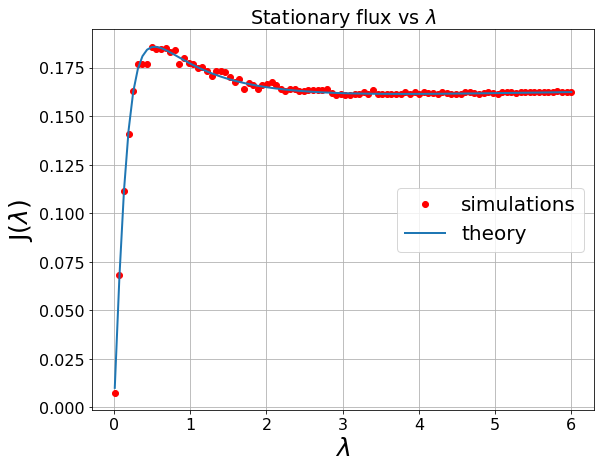

In [4]:
import numpy as np
import matplotlib.pyplot as plt
import time
plt.rcParams.update({'font.size': 16})

# Expected theoretical behaviour
def flux_xp(l):
    return l*(2-np.exp(-tau*l))/(2-(1+tau_b*l)*np.exp(-tau*l)+tau_b*l)

# Simulation function
def Flux(l,tau,tau_b,t_max):
    t,n,n_out = 0,0,0
    while t < t_max:
        dt = np.random.exponential(1/l)
        if n == 0: # no particle is present, so one is added after dt           
            t += dt
            n = 1
        elif n == 1:
            if dt <= tau: # second particle enters and the other one is still inside              
                t += dt + tau_b # two particles block the entrance in the passage for tau_b
                n_out += 2 # two particles exit together
                n = 0  # the passage is empty
            else: # second particle enters and the first one has already exited
                t += dt 
                n_out += 1 # flux is increased by one unit
                # n is not changed since one particle enters and one exits
    return n_out/t_max

t_in = time.time()
tau = 1
tau_b = 12
t_max = 5000
lambdas = np.linspace(0.01,6,100)
flux_sm = []
for l in lambdas:
    flux_sm.append(Flux(l,tau,tau_b,t_max))

# plot
plt.figure(figsize = (9,7))
plt.plot(lambdas,flux_sm,"o",c="r",label="simulations")
plt.plot(lambdas,flux_xp(lambdas),linewidth=2,label="theory")
plt.legend(loc=7,fontsize=20)
plt.xlabel("$\lambda$",fontsize=25)
plt.ylabel("J($\lambda$)",fontsize=25)
plt.title("Stationary flux vs $\lambda$")
plt.grid()

print("Execution time = "+str(time.time()-t_in))